<h1><center>Video Game Sales Data Analysis</center></h1>

Basically, there will be 5 step in any Data Analysis. They are:<br>

STEP 1: DEFINE QUESTIONS & GOALS.<br>
STEP 2: COLLECT DATA.<br>
STEP 3: DATA WRANGLING.<br>
STEP 4: DETERMINE ANALYSIS.<br>
STEP 5: INTERPRET RESULTS.

Lets begin with our project...

# 1. Defining question and goals

1. Most Popular Game
2. Most Sold game
3. Most revenue generating game

# 2. Collecting data

Importing all necessary libraries

In [1]:
# We need to import pandas to reas our dataset 
import numpy as np
import pandas as pd

# greeting = " Welcome to VSCode!"
# print(greeting)

Reading dataset and getting basic picture

In [2]:
df = pd.read_csv('D:/Data Analysis with Python/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<h3><Left>Metadata</Left></h3>

Quick overview about the video game sales data set

Name - The title of the Video Game<br>
Platform - The platform the game was released on (e.g. PC, Wii etc.)<br>
Year_of_Release - The year the game was released<br>
Genre - The genre of the game (as classified by vgchartz)<br>
Publisher - The company which published the game<br>
NA_Sales - Sales in North America (in millions)<br>
EU_Sales - Sales in Europe (in millions)<br>
JP_Sales - Sales in Japan (in millions)<br>
Other_Sales - Sales in the rest of the world (in millions)<br>
Global_Sales - Total sales across the world (in millions)<br>
Critic_Score - Rounded mean score given to a game by critics (an integer out of 100)<br>
Critic_Count - Number of critic scores given<br>
User_Score - Rounded mean score given to a game by users of vgchartz (to the nearest tenth)<br>
User_Count - Number of user scores given<br>
Developer - The comapny which developed the video game<br>
Rating - Official ESRB rating

# 3. Data Wrangling

Data Wrangling involves many technique for data preparation<br>
Checking the header or column names<br>



In [4]:
df.shape

(16719, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
# gives overview of all numeric data
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


[Note: Each and every value in the above table surely not give meaning.]

In [7]:
# All unique Platform names
print(df['Platform'].nunique())
print(df['Platform'].unique())

31
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [8]:
# All unique games
print("Total number of games are : ",df['Name'].nunique())
# print(df['Name'].unique())

Total number of games are :  11562


In [9]:
# All unique Genre
print("Total diffrent tyre of Genre are : ",df['Genre'].nunique())
print(df['Genre'].unique())

Total diffrent tyre of Genre are :  12
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [10]:
# All unique Publisher
print("Total distinct Publisher are : ",df['Publisher'].nunique())
# print(df['Publisher'].unique())

Total distinct Publisher are :  582


In [11]:
# All games
print("Number of diffrent developers are : ",df['Developer'].nunique())
# print(df['Developer'].unique())

Number of diffrent developers are :  1696


In [12]:
# All unique Ratings
print("Total unique Ratings are : ",df['Rating'].nunique())
# print(df['Rating'].unique())
print(df['Rating'].value_counts())

Total unique Ratings are :  8
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64


In [13]:
# Each year released games
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

Checking null values and treating them

In [14]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

As we can see Name and Genre is having 2 missing values each, since they are not numerical data we cannot impute these values with mean, median or with their previous or next values. Hence, its good practice to drop such rows. However, dropping publisher and Year of release will introduce bais in dataset also we cannot replace them by anything. hence best practice is to drop missing values and store in separate dataframe.

In [15]:
# Printing entries with no name
nan_name_values = df[df['Name'].isna()]
print (nan_name_values)

      Name Platform  Year_of_Release Genre              Publisher  NA_Sales  \
659    NaN      GEN           1993.0   NaN  Acclaim Entertainment      1.78   
14246  NaN      GEN           1993.0   NaN  Acclaim Entertainment      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
659        0.53      0.00         0.08          2.39           NaN   
14246      0.00      0.03         0.00          0.03           NaN   

       Critic_Count  User_Score  User_Count Developer Rating  
659             NaN         NaN         NaN       NaN    NaN  
14246           NaN         NaN         NaN       NaN    NaN  


In [16]:
# Dropping Rows with null name and storing in new dataframe 'df_no_null'
df_clean = df.dropna(subset=['Name'])

In [17]:
# We can notice there is no null value in Name
df_clean.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         9127
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

[Note: Null entries in Name and Genre were in same rows, hence bot got treated at once.]

In [18]:
# New column size
df_clean.shape

(16717, 16)

Converting user count, critic count and year into integer.

In [19]:
# df_clean = df_clean.astype({"Year_of_Release":'int'})

In [20]:
# df_clean[["Critic_Count","User_Count","Year_of_Release"]] = df_clean[["Critic_Count","User_Count","Year_of_Release"]].astype("int")                                                  
# df_clean["Year_of_Release"] = df_clean["Year_of_Release"].astype("int64")

Binning based on sales, poor, avegrage, good and best sale.

In [21]:
# bins = np.linspace(min(df_clean["Global_Sales"]),max(df_clean["Global_Sales"]),4)
# group_names = ['poor', 'average','good']
# df_clean['global-sales-binned'] = pd.cut(df_clean['Global_Sales'],bins, labels=group_names, include_lowest=True)
# df_clean[['Global_Sales','global-sales-binned']].head()

In [22]:
# df_clean['global-sales-binned'].value_counts()

Dummies created based on for Genre for plotting histogram

# 4. Determine alalysis

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:title={'center':'Heatmap of Video Sales Data'}>

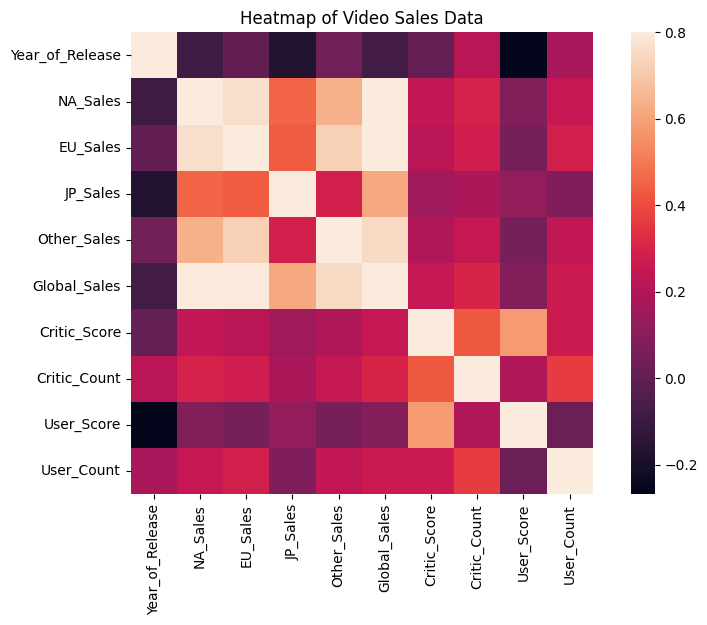

In [34]:
# Lets check the corelation firstly
corr = df_clean.corr()
plt.figure(figsize=(10,6))
plt.title("Heatmap of Video Sales Data")
sns.heatmap(corr, vmax=.8, square=True)

In [29]:
# We can see the all sales are strongly related with each other.
# User and Critic scores are also slightly relate with each other.

# Lets findout Sales insight based on requirement.

In [30]:
# 4.1 We need to analyze best in all category
# [Note: Based on dataset we can only find the popularity using their sale.]

# 10 most popular video games.

In [31]:
cat_totals = df_clean.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)
df_game = cat_totals.head(10)

<AxesSubplot:title={'center':'Most popular video games based most sale'}, xlabel='Sales in Million', ylabel='Name'>

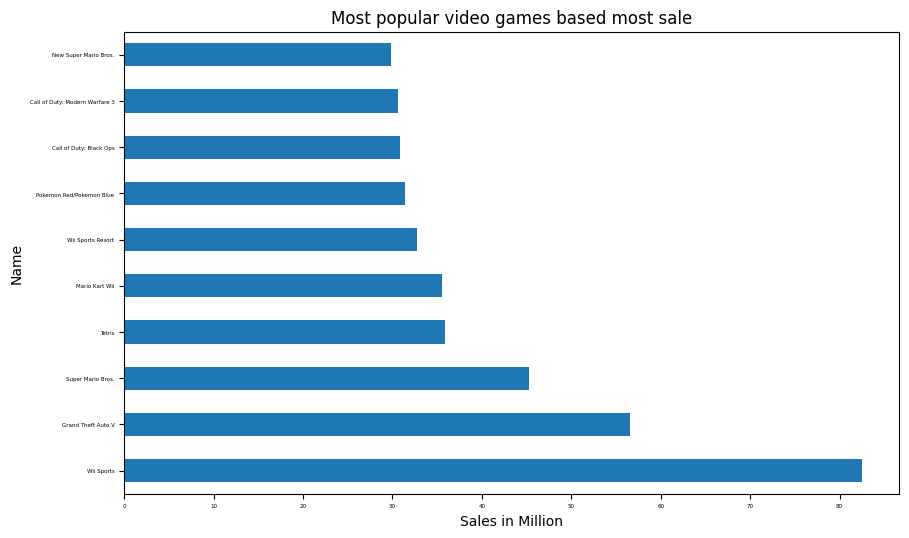

In [33]:
plt.figure(figsize=(10,6))
plt.title("Most popular video games based most sale")
plt.xlabel('Sales in Million')
df_game.plot(kind="barh", fontsize=4)

In [35]:
# Best Platforms for video games

[Text(0, 0, '2161'),
 Text(0, 0, '2152'),
 Text(0, 0, '1331'),
 Text(0, 0, '1320'),
 Text(0, 0, '1262'),
 Text(0, 0, '1209'),
 Text(0, 0, '1197'),
 Text(0, 0, '974'),
 Text(0, 0, '824'),
 Text(0, 0, '822'),
 Text(0, 0, '556'),
 Text(0, 0, '520'),
 Text(0, 0, '432'),
 Text(0, 0, '393'),
 Text(0, 0, '319'),
 Text(0, 0, '247'),
 Text(0, 0, '239'),
 Text(0, 0, '173'),
 Text(0, 0, '147'),
 Text(0, 0, '133'),
 Text(0, 0, '98'),
 Text(0, 0, '98'),
 Text(0, 0, '52'),
 Text(0, 0, '29'),
 Text(0, 0, '12'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

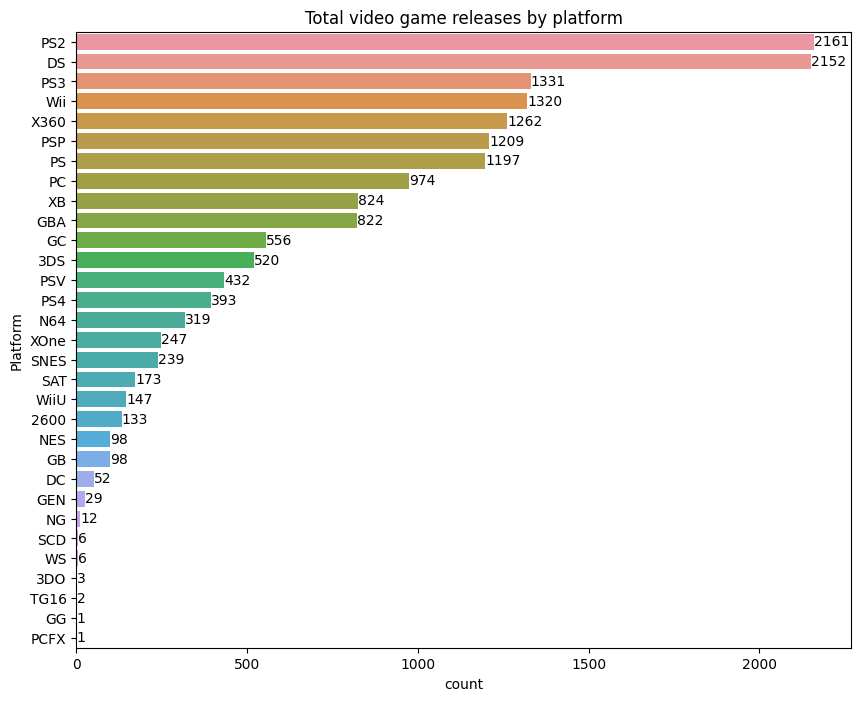

In [37]:
# Total video games released by each platform

plt.figure(figsize=(10,8))
plt.title("Total video game releases by platform")
ax = sns.countplot(y='Platform', data=df_clean, order=df_clean.Platform.value_counts().index)
abs_values = df['Platform'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [38]:
# Most Popular Genres

[Text(0, 0, '3370'),
 Text(0, 0, '2348'),
 Text(0, 0, '1750'),
 Text(0, 0, '1500'),
 Text(0, 0, '1323'),
 Text(0, 0, '1303'),
 Text(0, 0, '1249'),
 Text(0, 0, '888'),
 Text(0, 0, '874'),
 Text(0, 0, '849'),
 Text(0, 0, '683'),
 Text(0, 0, '580')]

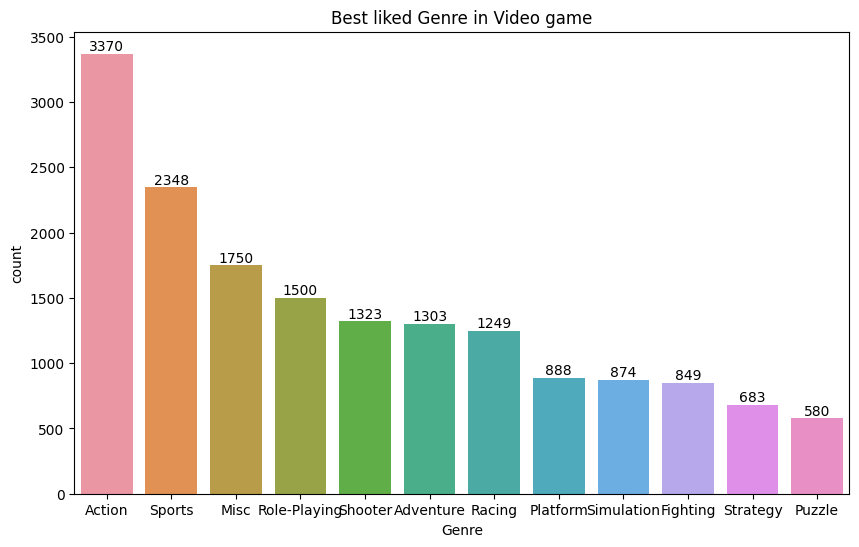

In [41]:
# Most liked Genre for video games

plt.figure(figsize=(10,6))
plt.title("Best liked Genre in Video game")
ax = sns.countplot(x='Genre', data=df_clean, order=df_clean.Genre.value_counts().index)
abs_values = df['Genre'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Most video games published

[Text(0, 0, '3991'),
 Text(0, 0, '2961'),
 Text(0, 0, '1563'),
 Text(0, 0, '1420'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

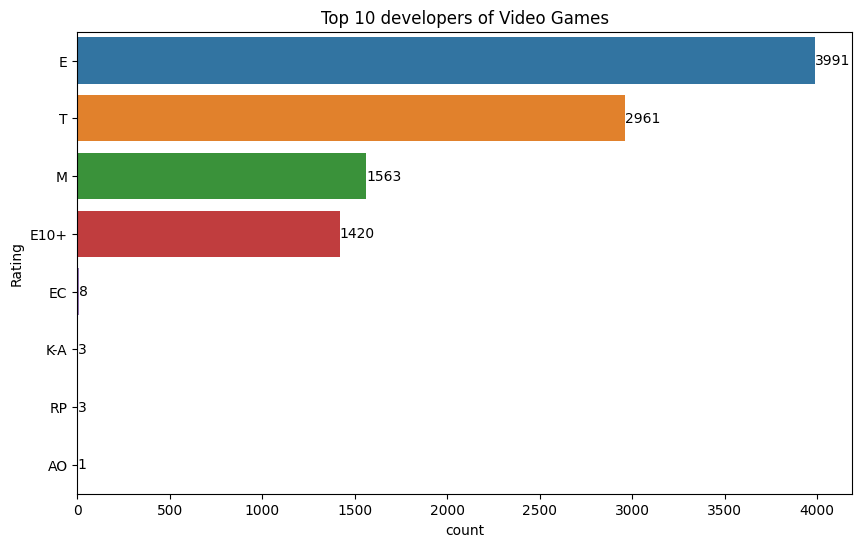

In [42]:
# Mostly rating is achieved all games 

plt.figure(figsize=(10,6))
plt.title("Top 10 developers of Video Games")
ax = sns.countplot(y='Rating', data=df_clean, order=df_clean.Rating.value_counts().iloc[:10].index)
abs_values = df['Rating'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Most liked Genre for video games

AttributeError: 'NoneType' object has no attribute 'get_bbox'

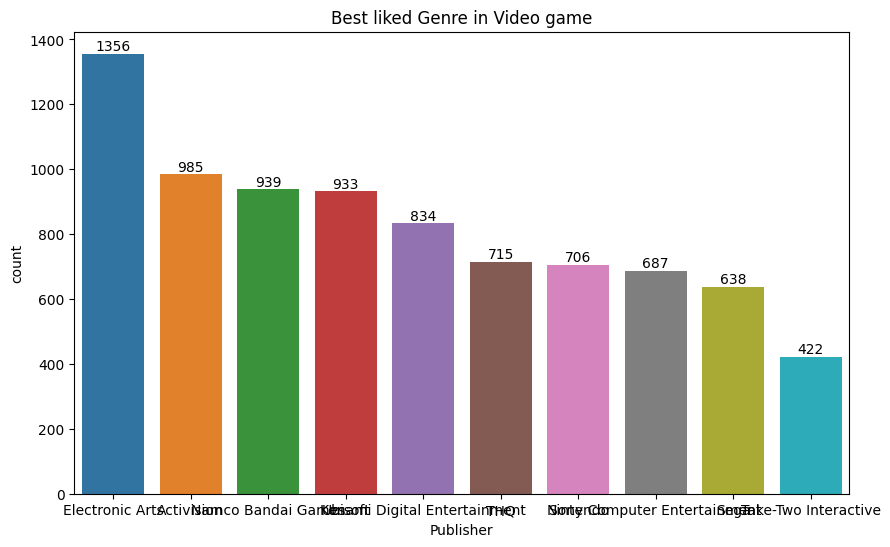

In [44]:
# Most liked Genre for video games

plt.figure(figsize=(10,6))
plt.title("Best liked Genre in Video game")
ax = sns.countplot(x='Publisher', data=df_clean, order=df_clean.Publisher.value_counts().iloc[:10].index)
abs_values = df['Publisher'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Top Developers

AttributeError: 'NoneType' object has no attribute 'get_bbox'

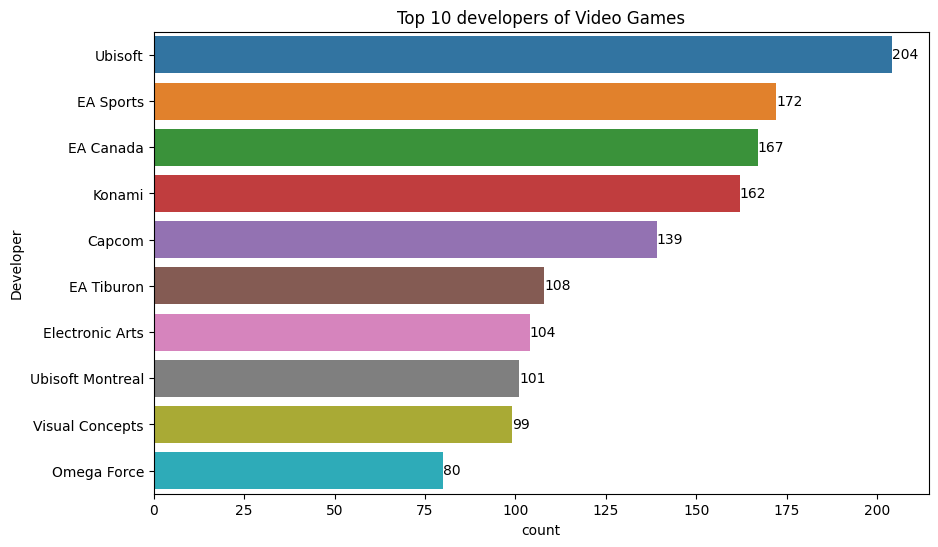

In [46]:
# Top Developers

plt.figure(figsize=(10,6))
plt.title("Top 10 developers of Video Games")
ax = sns.countplot(y='Developer', data=df_clean, order=df_clean.Developer.value_counts().iloc[:10].index)
abs_values = df['Developer'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Testing for region wise sales analysis branch commit and pull request.

# 5. Interprit result